In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
online = pd.read_csv('Onlinesales_info.csv')
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [3]:
cus = pd.read_csv('Customer_info.csv')
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [4]:
dis = pd.read_csv('Discount_info.csv')
dis

,월,제품카테고리,쿠폰코드,할인율
0,Jan,Apparel,SALE10,10
1,Feb,Apparel,SALE20,20
2,Mar,Apparel,SALE30,30
3,Jan,Nest-USA,ELEC10,10
4,Feb,Nest-USA,ELEC20,20
...,...,...,...,...
199,Nov,Notebooks & Journals,NJ20,20
200,Dec,Notebooks & Journals,NJ30,30
201,Oct,Android,AND10,10
202,Nov,Android,AND20,20


# 탐색적 데이터 분석(EDA)

In [6]:
online['제품카테고리'].value_counts()

제품카테고리
Apparel                 18126
Nest-USA                14013
Office                   6513
Drinkware                3483
Lifestyle                3092
Nest                     2198
Bags                     1882
Headgear                  771
Notebooks & Journals      749
Waze                      554
Nest-Canada               317
Bottles                   268
Accessories               234
Fun                       160
Gift Cards                159
Housewares                122
Google                    105
Backpacks                  89
More Bags                  46
Android                    43
Name: count, dtype: int64

In [7]:
online['쿠폰상태'].value_counts()

쿠폰상태
Clicked     26926
Used        17904
Not Used     8094
Name: count, dtype: int64

In [8]:
cus['고객지역'].value_counts()

고객지역
California       464
Chicago          456
New York         324
New Jersey       149
Washington DC     75
Name: count, dtype: int64

<Axes: xlabel='고객지역', ylabel='count'>

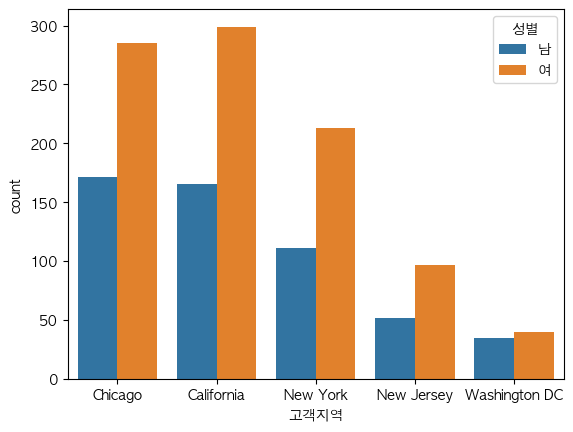

In [9]:
from matplotlib import rc
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

sns.countplot(cus,x='고객지역',hue='성별')
# 모든 지역에서 여성 고객이 더 많음.

/Users/t2023-m0093/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='고객지역', ylabel='Count'>

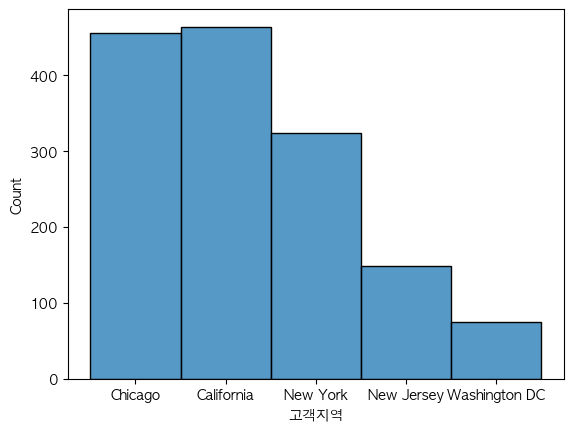

In [10]:
sns.histplot(cus,x='고객지역')

<Axes: xlabel='쿠폰상태', ylabel='count'>

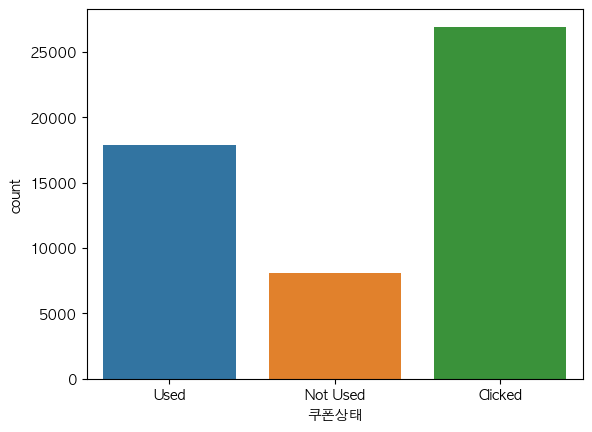

In [11]:
sns.countplot(online,x='쿠폰상태')

# 1. 지도로 folium 시각화, 지역별 카테고리별 구매 수량

In [13]:
online_cus = pd.merge(online, cus, on='고객ID')
online_cus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52924 entries, 0 to 52923
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   고객ID    52924 non-null  object 
 1   거래ID    52924 non-null  object 
 2   거래날짜    52924 non-null  object 
 3   제품ID    52924 non-null  object 
 4   제품카테고리  52924 non-null  object 
 5   수량      52924 non-null  int64  
 6   평균금액    52924 non-null  float64
 7   배송료     52924 non-null  float64
 8   쿠폰상태    52924 non-null  object 
 9   성별      52924 non-null  object 
 10  고객지역    52924 non-null  object 
 11  가입기간    52924 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 4.8+ MB


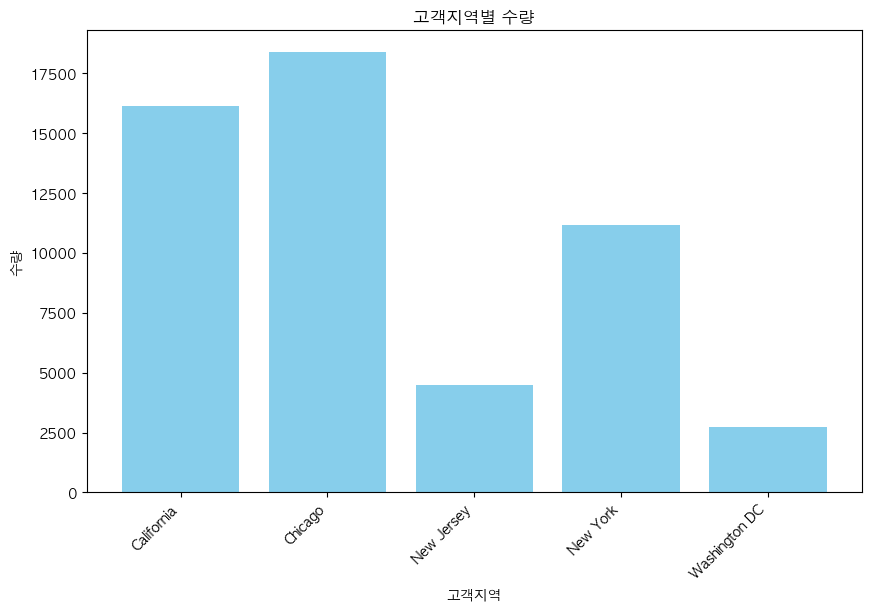

In [14]:
online_cus = online_cus.groupby('고객지역').agg({'수량': 'count','평균금액': 'median','배송료': 'mean'}).reset_index()
online_cus

df = pd.DataFrame(online_cus)

plt.figure(figsize=(10, 6))
plt.bar(df['고객지역'], df['수량'], color='skyblue')
plt.title('고객지역별 수량')
plt.xlabel('고객지역')
plt.ylabel('수량')
plt.xticks(rotation=45, ha='right')


plt.show()
# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC

In [15]:
import folium
from geopy.geocoders import Nominatim
from folium.plugins import MarkerCluster

data = {
    '고객지역': ['California', 'Chicago', 'New Jersey', 'New York', 'Washington DC'],
    '수량': [16136, 18380, 4503, 11173, 2732]
}

df = pd.DataFrame(data)


# 각 고객지역의 위도와 경도 가져오기
geolocator = Nominatim(user_agent="geoapi")

df['location'] = df['고객지역'].apply(geolocator.geocode)


df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)
# 그 지역정보 에서 위도와 경도 정보를 찾아서 튜플 형태로 저장한다.
# 만약 지역정보를 못 찾았다면 None으로 저장



# 미국 중심 좌표
map_center = [37.7749, -122.4194]


customer_region_map = folium.Map(location=map_center, zoom_start=4)

# MarkerCluster 객체 생성
marker_cluster = MarkerCluster().add_to(customer_region_map)

# 각 지역에 마커 추가
for i in range(len(df)):
    if df['point'].iloc[i] is not None:
        folium.Marker(
            location=df['point'].iloc[i][:2],  # 위도와 경도까지만 쓸것
            popup=f"{df['고객지역'].iloc[i]} 수량: {df['수량'].iloc[i]}",
            tooltip=f"{df['고객지역'].iloc[i]}",
        ).add_to(marker_cluster)

# Folium 지도 저장
customer_region_map.save('customer_quantity_map.html')

In [16]:
customer_region_map

# 2. 쿠폰 클릭한 기록은 있으나 사용 X, 결제는 성공

# 4.  구매 날짜 사이의 간격. Frequency랑 연결.

In [18]:
online['거래날짜'] = pd.to_datetime(online['거래날짜'])

# 각 고객의 최소 & 최대 거래날짜
customer_intervals = online.groupby('고객ID')['거래날짜'].agg(['min', 'max'])

# 거래 간격 계산
customer_intervals['거래간격'] = customer_intervals['max'] - customer_intervals['min']
customer_intervals

,min,max,거래간격
고객ID,,,
USER_0000,2019-09-15,2019-09-15,0 days
USER_0001,2019-03-24,2019-11-02,223 days
USER_0002,2019-06-22,2019-10-19,119 days
USER_0003,2019-12-14,2019-12-14,0 days
USER_0004,2019-09-15,2019-09-15,0 days
...,...,...,...
USER_1463,2019-04-05,2019-04-05,0 days
USER_1464,2019-06-22,2019-10-05,105 days
USER_1465,2019-04-05,2019-06-20,76 days


In [19]:
customer_intervals['거래간격'].value_counts()
# 동일한 날에 여러번 구매한 고객이 월등히 많고, 하루 차이로 구매한 고객이 많다.

거래간격
0 days      734
1 days      117
15 days       6
182 days      6
126 days      6
           ... 
325 days      1
315 days      1
188 days      1
81 days       1
105 days      1
Name: count, Length: 284, dtype: int64

In [20]:
online['거래날짜'].value_counts()

거래날짜
2019-11-27    335
2019-07-13    311
2019-08-16    298
2019-08-02    292
2019-07-31    291
             ... 
2019-02-05     41
2019-01-28     39
2019-12-24     35
2019-08-20     32
2019-07-01     27
Name: count, Length: 365, dtype: int64

# 기간별로 등급 groupby
- (12개월 미만 / 12개월 / 24개월 / 36개월 / 48개월 / 50개월)

In [24]:
online

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used
...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked


In [25]:
cus

,고객ID,성별,고객지역,가입기간
0,USER_1358,남,Chicago,12
1,USER_0190,남,California,43
2,USER_0066,남,Chicago,33
3,USER_0345,여,California,30
4,USER_0683,남,California,49
...,...,...,...,...
1463,USER_0513,여,New York,41
1464,USER_0167,여,Chicago,48
1465,USER_0845,남,New Jersey,19
1466,USER_0504,여,New York,45


In [26]:
online_cus = pd.merge(online, cus, on='고객ID')

In [27]:
def seg(x):
    if x >= 50 :
        return "vip"
    elif x >= 48 : 
        return "diamond"
    elif x >= 36 :
        return "gold"
    elif x >= 24 :
        return "silver"
    elif x >= 12 : 
        return "bronze"
    else :
        return "new"

In [28]:
online_cus['고객등급'] = online_cus['가입기간'].apply(seg)
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new


In [29]:
online_cus['고객등급'].value_counts(normalize=True)

고객등급
silver     0.290851
gold       0.240779
bronze     0.226646
new        0.195204
diamond    0.032594
vip        0.013926
Name: proportion, dtype: float64

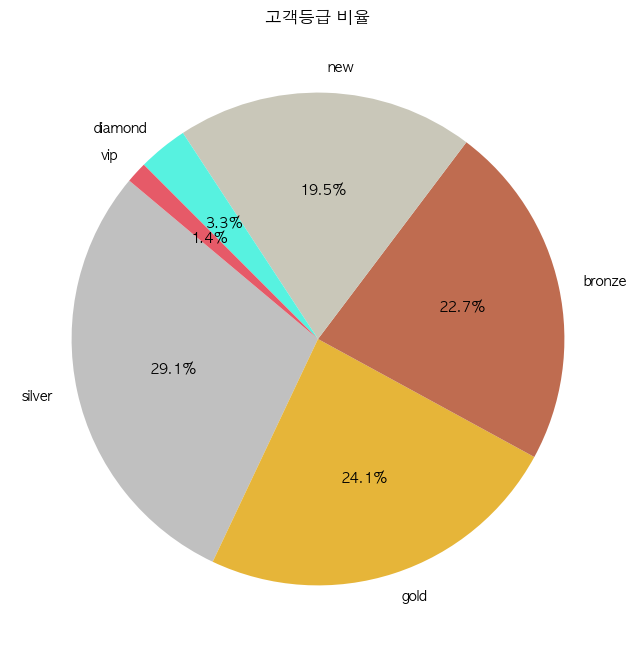

In [30]:
proportions = [0.290851, 0.240779, 0.226646, 0.195204, 0.032594, 0.013926]
labels = ['silver', 'gold', 'bronze', 'new', 'diamond', 'vip']


plt.figure(figsize=(8, 8))
plt.pie(proportions, labels=labels, autopct='%1.1f%%', startangle=140, colors=['silver', '#e6b539', '#bf6c50', '#c9c7b9', '#57f2e0', '#e65a68'])
plt.title('고객등급 비율')
plt.show()

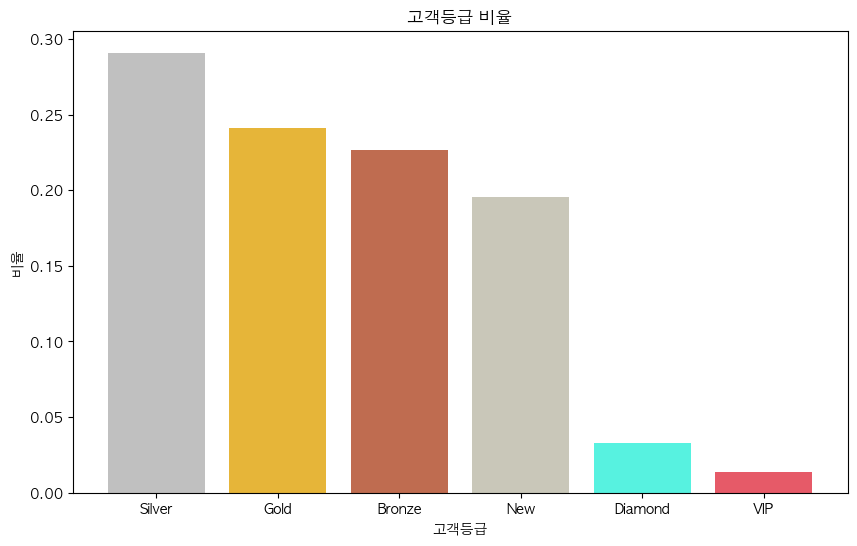

In [31]:
# 주어진 고객등급 비율 데이터
proportions = [0.290851, 0.240779, 0.226646, 0.195204, 0.032594, 0.013926]
labels = ['Silver', 'Gold', 'Bronze', 'New', 'Diamond', 'VIP']

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
plt.bar(labels, proportions, color=['silver', '#e6b539', '#bf6c50', '#c9c7b9', '#57f2e0', '#e65a68'])
plt.title('고객등급 비율')
plt.xlabel('고객등급')
plt.ylabel('비율')
plt.title('고객등급 비율')
plt.show()

# silver 등급 : 가입기간이 12 ~ 24 개월 사이인 유저들이 가장 많음.
# new 등급 : 가입기간이 1년 미만인 유저들

# 구매 물품 목록 / 구매 금액별 분류하기 / 지역별로 구매의 잦음 정도 

In [32]:
pd.DataFrame(online_cus.groupby(["고객지역", "제품카테고리"])['수량'].sum())

수량
고객지역          제품카테고리                    
California    Accessories            461
              Android                 14
              Apparel               9669
              Backpacks               36
              Bags                  4495
...                                  ...
Washington DC Nest-Canada             30
              Nest-USA              1240
              Notebooks & Journals   250
              Office                4761
              Waze                    53

[100 rows x 1 columns]

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_16842/3951551204.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories = df.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


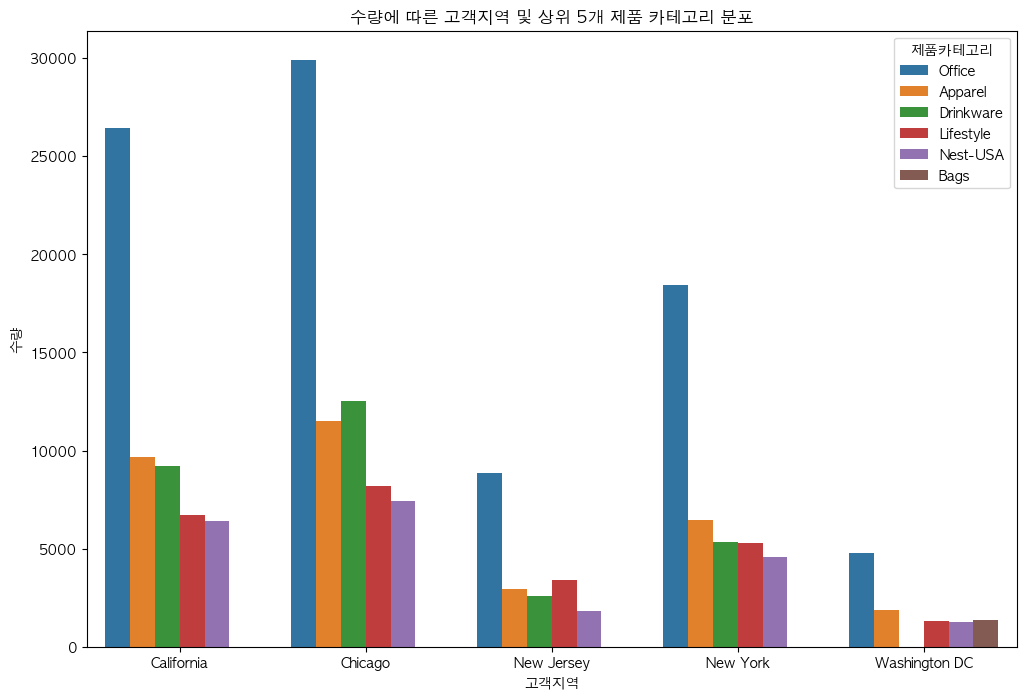

In [33]:
df = online_cus.groupby(["고객지역", "제품카테고리"])['수량'].sum().reset_index()

# 수량이 높은 상위 5개 행만 고른다.
# 그룹 키는 결과에서 제외함.
top_categories = df.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='수량', hue='제품카테고리', data=top_categories)


plt.title('수량에 따른 고객지역 및 상위 5개 제품 카테고리 분포')
plt.xlabel('고객지역')
plt.ylabel('수량')


plt.legend(title='제품카테고리')
plt.show()

## 지역별로 많이 판매되는 물품 카테고리 순서
- 시카고 : Office > DrinkWare > Apparel > Lifestyle > Nest-USA
- 캘리포니아 : Office > Apparel > DrinkWare > Lifestyle > Nest-USA
- 뉴욕 : Office > Apparel > DrinkWare > Lifestyle > Nest-USA
- 뉴저지 : Office > Lifestyle > Apparel > DrinkWare > Nest-USA
- 워싱턴 DC : Office > Apparel > Bags >= Lifestyle > Nest-USA

## 지역별 총 구매금액

In [34]:
# 수량과 (제품 ID당) 금액 을 곱하여 구매 금액이라는 컬럼 생성
online_cus['구매금액'] = online_cus['수량'] * online_cus['평균금액']
online_cus

,고객ID,거래ID,거래날짜,제품ID,제품카테고리,수량,평균금액,배송료,쿠폰상태,성별,고객지역,가입기간,고객등급,구매금액
0,USER_1358,Transaction_0000,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
1,USER_1358,Transaction_0001,2019-01-01,Product_0981,Nest-USA,1,153.71,6.50,Used,남,Chicago,12,bronze,153.71
2,USER_1358,Transaction_0002,2019-01-01,Product_0904,Office,1,2.05,6.50,Used,남,Chicago,12,bronze,2.05
3,USER_1358,Transaction_0003,2019-01-01,Product_0203,Apparel,5,17.53,6.50,Not Used,남,Chicago,12,bronze,87.65
4,USER_1358,Transaction_0003,2019-01-01,Product_0848,Bags,1,16.50,6.50,Used,남,Chicago,12,bronze,16.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52919,USER_0504,Transaction_25056,2019-12-31,Product_0976,Nest-USA,1,121.30,6.50,Clicked,여,New York,45,gold,121.30
52920,USER_0504,Transaction_25057,2019-12-31,Product_0413,Apparel,1,48.92,6.50,Used,여,New York,45,gold,48.92
52921,USER_0504,Transaction_25058,2019-12-31,Product_0989,Nest-USA,1,151.88,6.50,Used,여,New York,45,gold,151.88
52922,USER_0562,Transaction_25059,2019-12-31,Product_0985,Nest-USA,5,80.52,6.50,Clicked,여,California,7,new,402.60


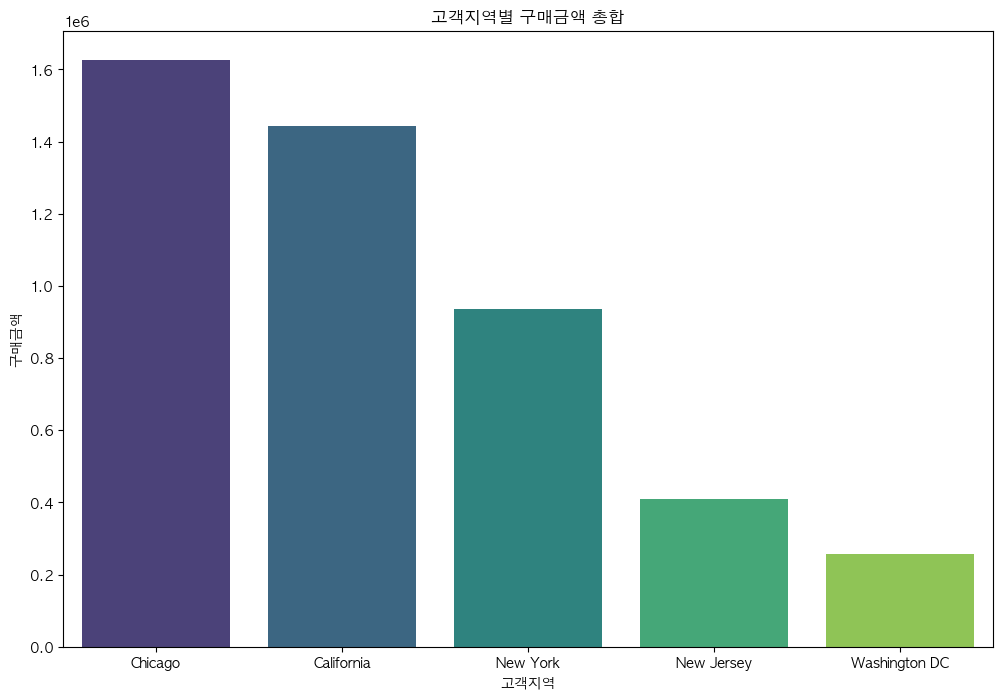

In [35]:
total_pur_region = online_cus.groupby('고객지역')['구매금액'].sum().reset_index()

total_pur_region = total_pur_region.sort_values(by='구매금액', ascending=False)

    
plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='구매금액', data=total_pur_region, palette='viridis')

plt.title('고객지역별 구매금액 총합')
plt.xlabel('고객지역')
plt.ylabel('구매금액')

plt.show()

# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매금액 총합 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC"

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_16842/2629474627.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_categories_by_region = top_categories_by_region.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))


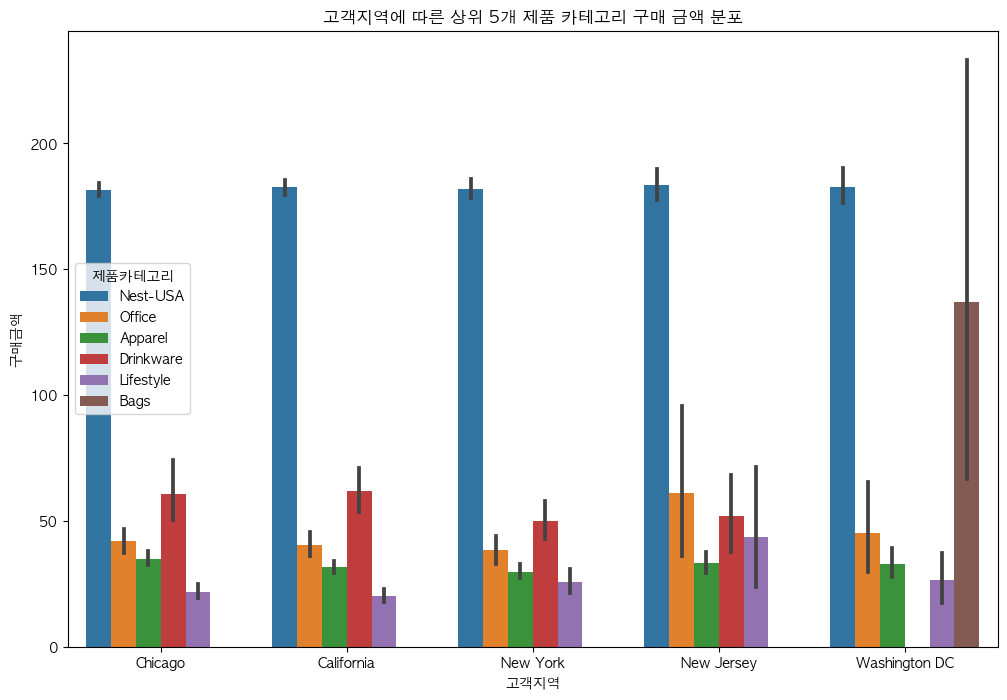

In [36]:
# 각 고객지역에서 수량이 높은 상위 5개 카테고리 선택
top_categories_by_region = online_cus.groupby(['고객지역', '제품카테고리'])['수량'].sum().reset_index()
top_categories_by_region = top_categories_by_region.groupby('고객지역', group_keys=False).apply(lambda x: x.nlargest(5, '수량'))

selected_data = online_cus.merge(top_categories_by_region[['고객지역', '제품카테고리']], on=['고객지역', '제품카테고리'])


plt.figure(figsize=(12, 8))
sns.barplot(x='고객지역', y='구매금액', hue='제품카테고리', data=selected_data)


plt.title('고객지역에 따른 상위 5개 제품 카테고리 구매 금액 분포')
plt.xlabel('고객지역')
plt.ylabel('구매금액')


plt.legend(title='제품카테고리')

plt.show()

In [37]:
grouped_on_cus = online_cus.groupby(["고객ID", "거래날짜"]).agg('first')

grouped_on_cus = grouped_on_cus.reset_index()
grouped_on_cus['거래날짜'] = pd.to_datetime(grouped_on_cus['거래날짜'])
grouped_on_cus["날짜차이"] = grouped_on_cus["거래날짜"].diff()


result_on_cus = grouped_on_cus.groupby("고객ID").apply(lambda x: x.iloc[1:]).reset_index(drop=True)
result_on_cus['날짜차이'].apply(lambda x: x.days)
result_on_cus['날짜차이2'] = result_on_cus['날짜차이'].apply(lambda x: x.days)

result_on_cus['날짜차이2'] = result_on_cus['날짜차이2'].astype(int)

result_on_cus['거래날짜'] = pd.to_datetime(result_on_cus['거래날짜'])


result_df = result_on_cus.groupby('고객ID').agg({'날짜차이2': 'mean', '고객지역': 'first'})
result_df

/var/folders/kn/qnjl17gs6tvgr8yxlz_6mfxc0000gn/T/ipykernel_16842/2448149036.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_on_cus = grouped_on_cus.groupby("고객ID").apply(lambda x: x.iloc[1:]).reset_index(drop=True)


,날짜차이2,고객지역
고객ID,,
USER_0001,111.5,New York
USER_0002,119.0,California
USER_0006,30.0,New York
USER_0008,139.0,California
USER_0009,24.0,New York
...,...,...
USER_1459,150.5,New York
USER_1460,73.5,Washington DC
USER_1464,52.5,New York


In [38]:
result_df = result_df.groupby('고객지역')['날짜차이2'].mean()
result_df

고객지역
California       64.374860
Chicago          64.100521
New Jersey       79.730714
New York         61.776036
Washington DC    60.659101
Name: 날짜차이2, dtype: float64

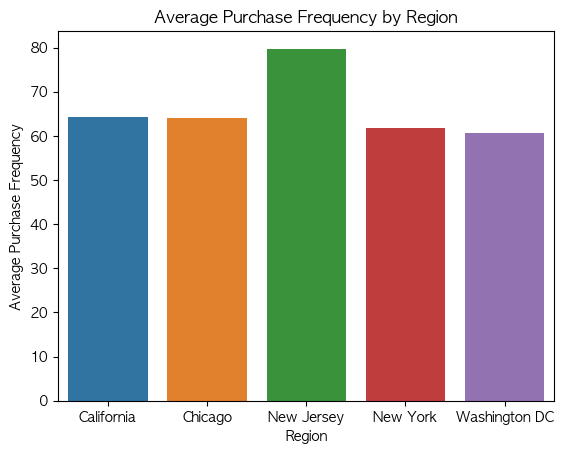

In [39]:
sns.barplot(x=result_df.index, y=result_df.values)
plt.title('Average Purchase Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Average Purchase Frequency')
plt.show()

# 지역별 판매 수량 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매금액 총합 : 시카고 > 캘리포니아 > 뉴욕 > 뉴저지 > 워싱턴 DC
# 지역별 구매 빈번도 순위 : 워싱턴 DC > 뉴욕 > 시카고 > 캘리포니아 > 뉴저지

# 판매 수량과 금액 총합에서 워싱턴 DC가 가장 꼴찌인데, 가장 빈번하게 접속하는 지역은 워싱턴 DC
# 자주 구매한다는 특성을 살려 워싱턴 DC 지역주민들에게 출석체크 이벤트? 쿠폰 발행이나 포인트 적립 .. 